<a href="https://colab.research.google.com/github/Eduardoqro/Kata-Data-Visualization/blob/main/Modulo_6_NumerialDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datos numéricos y categóricos

Normalmente usados para explorar/describir 

#### ¿Cuánto espacio de mi universo muestral ocupa cierta categoria/grupo conforme a mis datos?

La gráfica más choteada (Definir choteada en todos los países) es la Bar Graph o Bar Plot o por ejemplo seaborn le dice CountPlot y ésta es la version Categorica de un histograma 🤓

> A bar graph shows comparisons among discrete categories.



> Wikipedia

> [Canal de Youtube de Sidney](https://www.youtube.com/channel/UCVQJZE_on7It_pEv6tn-jdA) (De donde se obtienen los datos a analizar)

### BARCHART

In [101]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

In [5]:
#leer archivos desde drive
#from google.colab import drive
#drive.mount('/content/drive')


In [6]:
df = pd.read_pickle('/content/sydney.pkl')
df.shape
df

,title,posted_ago,length,views,link,calories,date,days_since_posted,title_word_set,area,...,title_contains_tone,title_contains_kickboxing,title_contains_workout,title_contains_boot camp,title_contains_burnout,title_contains_toned,title_contains_superset,num_body_areas,num_workout_types,num_other_keywords
0,30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥,1 year,31.0,197591,/watch?v=Mcpyp9PRtU8,500.0,2018-02-01,711.0,"{calori, 30, minut, 🔥burn, !, hiit, 500, worko...",full,...,False,False,True,False,False,False,False,1,2,1
1,30 Minute HIIT Tabata Workout Sydney Cummings,1 year,31.0,75863,/watch?v=m40O_U8_4UE,NaN,2018-02-06,706.0,"{cum, 30, minut, hiit, tabata, sydney, workout}",full,...,False,False,True,False,False,False,False,1,3,1
2,30 Minute Abs Workout With Sydney Cummings | B...,1 year,32.0,60328,/watch?v=DWUupF-Sfyc,350.0,2018-02-08,704.0,"{calori, |, cum, 30, with, 350, minut, burn, !...",ab,...,False,False,True,False,False,False,False,1,2,1
3,30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥,1 year,31.0,59741,/watch?v=R3T3U9iFg0o,430.0,2018-02-11,701.0,"{calori, bodi, total, 30, minut, 🔥burn, !, hii...",full,...,False,False,False,False,False,False,False,1,1,0
4,30 Minute Workout For Beginners 🔥Burn 285 Calo...,1 year,31.0,18515,/watch?v=TLeMsJG30zU,285.0,2018-02-12,700.0,"{calori, beginn, 30, minut, 🔥burn, !, for, 285...",full,...,False,False,True,False,False,False,False,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,40 Minute Upper Body and Cardio Finisher Worko...,4 days,43.0,23454,/watch?v=ZPgMt3RsN6Y,350.0,2020-01-09,4.0,"{day, |, bodi, 🔥burn, challeng, *, finish, cha...",upper,...,False,False,True,False,False,False,False,1,2,1
725,40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...,3 days,45.0,23036,/watch?v=7VtNR-EzWok,490.0,2020-01-10,3.0,"{40, day, leg, |, calori, 490, 🔥the, *, minut,...",leg,...,False,False,True,False,False,False,False,1,2,1
726,30 Minute Sports Cardio Workout 🔥Burn 360 Calo...,2 days,34.0,21364,/watch?v=QqodbwrdEq4,360.0,2020-01-11,2.0,"{day, calori, |, 30, 🔥the, cardio, *, minut, 🔥...",full,...,False,False,True,False,False,False,False,1,2,2
727,20 Minute Sore Body Deep Stretch | The CHANGE ...,1 day,22.0,6683,/watch?v=GmS3BEWbYgQ,NaN,2020-01-12,1.0,"{day, |, 20, 7, bodi, minut, deep, the, sore, ...",full,...,False,False,False,False,False,False,False,1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        729 non-null    object        
 1   posted_ago                   729 non-null    object        
 2   length                       729 non-null    float64       
 3   views                        729 non-null    int64         
 4   link                         729 non-null    object        
 5   calories                     588 non-null    float64       
 6   date                         729 non-null    datetime64[ns]
 7   days_since_posted            729 non-null    float64       
 8   title_word_set               729 non-null    object        
 9   area                         729 non-null    object        
 10  workout_type                 729 non-null    object        
 11  is_butt_area                 729 non-null    

In [8]:
df.shape #filas y columnas

(729, 60)

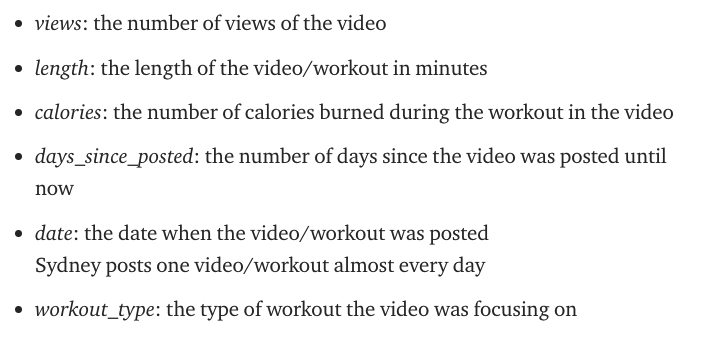

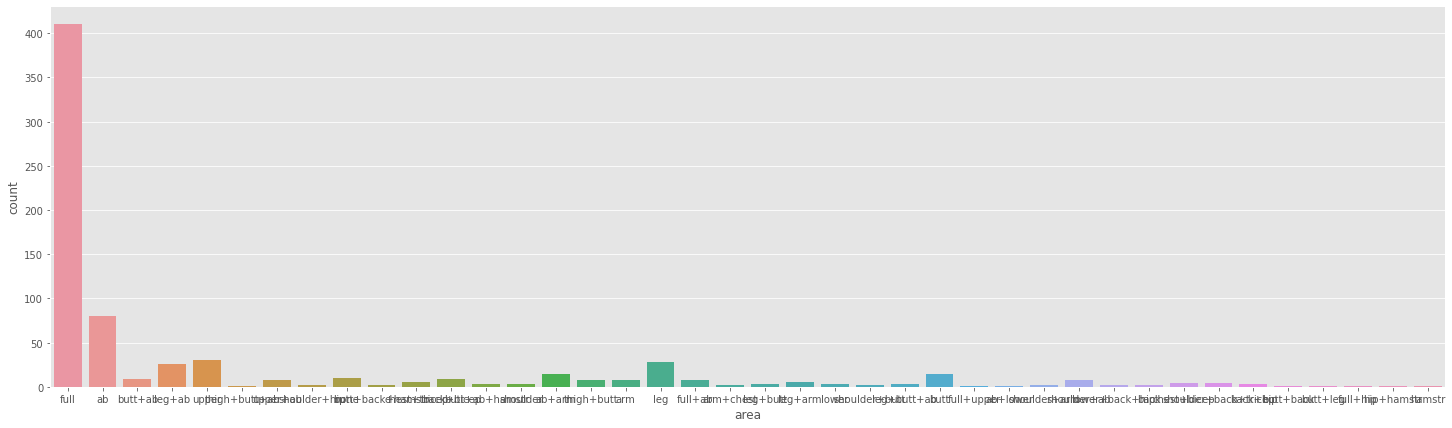

In [9]:
df_non_numeric = df.select_dtypes(exclude='number') #separar los datos y llamos solo los no numericos
df_non_numeric
plt.figure(figsize=(25,7))
sns.countplot(x="area",
            data=df_non_numeric)

In [10]:
df_non_numeric.info() #datos no numericos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        729 non-null    object        
 1   posted_ago                   729 non-null    object        
 2   link                         729 non-null    object        
 3   date                         729 non-null    datetime64[ns]
 4   title_word_set               729 non-null    object        
 5   area                         729 non-null    object        
 6   workout_type                 729 non-null    object        
 7   is_butt_area                 729 non-null    bool          
 8   is_core_area                 729 non-null    bool          
 9   is_booti_area                729 non-null    bool          
 10  is_shoulder_area             729 non-null    bool          
 11  is_lower_area                729 non-null    

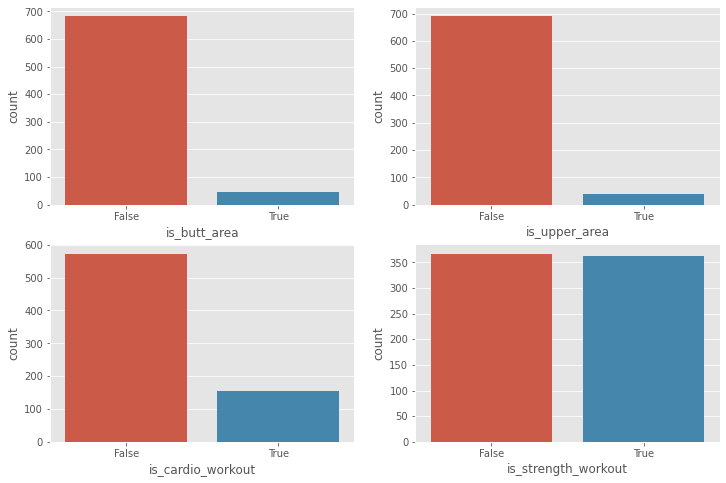

In [11]:
# this plots multiple seaborn countplots on different subplots.
# 
def plot_multiple_countplots(df, cols):               #recorremos todo el dataset y vemos cuantos estan relacionadas con la area de butt y upper
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    axs = axs.ravel()
    for col, ax in zip(cols, axs):
      sns.countplot(x=df[col], ax=ax)

 #   for ind, col in enumerate(cols):
 #       i = math.floor(ind/num_cols)
 #       j = ind - i*num_cols
 #       
 #       if num_rows == 1:
 #           if num_cols == 1:
 #               sns.countplot(x=df[col], ax=axs)
 #           else:
 #               sns.countplot(x=df[col], ax=axs[j])
 #       else:
 #           sns.countplot(x=df[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])

### Relación entre 2 Variables Categóricas

> Cuales son los tipos de entrenamiento por área más populares en el canal?

In [12]:
df.groupby(['area', 'workout_type']).size()

area      workout_type   
ab        cardio             25
          hiit                5
          hiit+cardio         9
          none                1
          strength           25
                             ..
upper     cardio              8
          hiit+cardio         2
          strength           17
          strength+cardio     3
upper+ab  strength            8
Length: 89, dtype: int64

In [13]:
df['area'].value_counts()[:5]

full      410
ab         80
upper      30
leg        28
leg+ab     26
Name: area, dtype: int64

In [14]:
~np.array([True, False])

array([False,  True])

In [15]:
top6 = list(df['area'].value_counts().index[:5])
df['area2'] = df['area']

print(top6)

top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

print(top4)

msk = df['area2'].isin(top6)
df.loc[~msk, 'area2'] = 'Other'

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

['full', 'ab', 'upper', 'leg', 'leg+ab']
['strength', 'hiit', 'stretch']


In [16]:
df[['area2', 'workout_type2']]

,area2,workout_type2
0,full,hiit
1,full,Other
2,ab,strength
3,full,hiit
4,full,strength
...,...,...
724,upper,Other
725,leg,strength
726,full,Other
727,full,stretch


In [17]:
df['area2'].value_counts().index

Index(['full', 'Other', 'ab', 'upper', 'leg', 'leg+ab'], dtype='object')

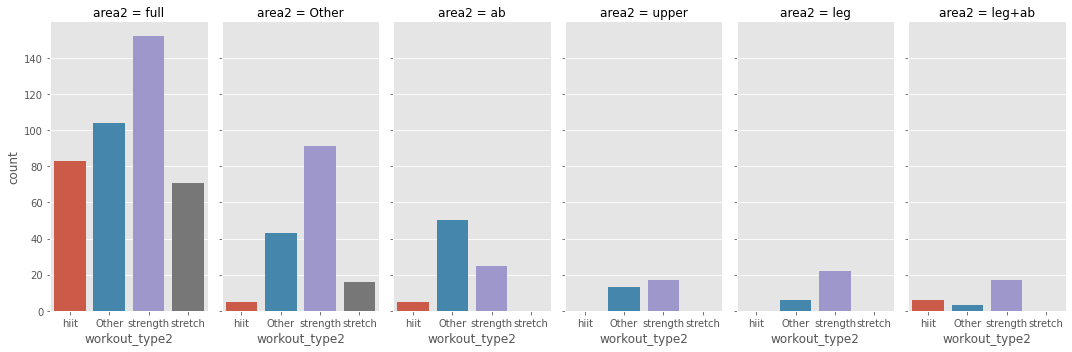

In [18]:
order = df['area2'].value_counts().index # order the columns from highest count to lowest.
g = sns.catplot(x="workout_type2",
            col='area2',
            col_order=order,
            kind="count", data=df,
            aspect=0.5)

#### A ver nomás por acordarnos...
### Scatter

> Cuál sería la mejor duración de videos para obtener más vistas?

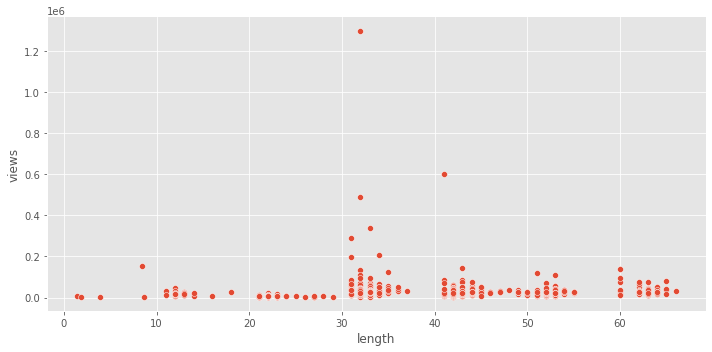

In [19]:
sns.relplot(x='length', y='views', data=df, aspect=2.0)  #dispersion general

### BOXPLOTS

> A box plot (box-and-whisker plot) is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.


> are useful visualizations when comparing groups of categories together.



>Wikipedia

In [21]:
#df['date'].dt.dayofweek.replace(to_replace= to_replace)

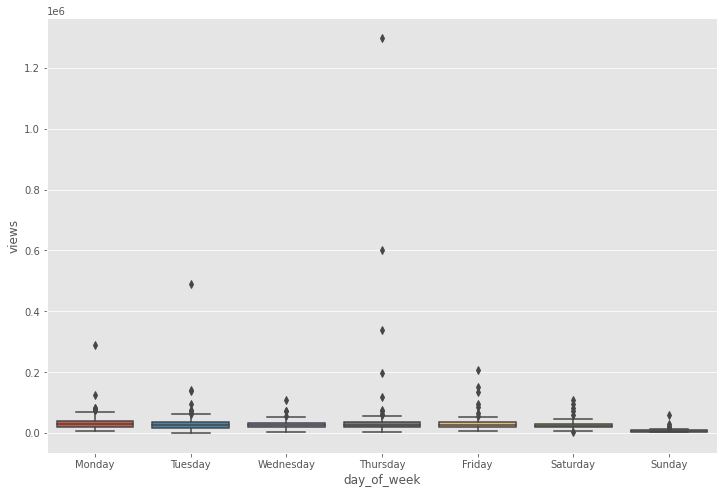

In [22]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views", data=df, order=order)

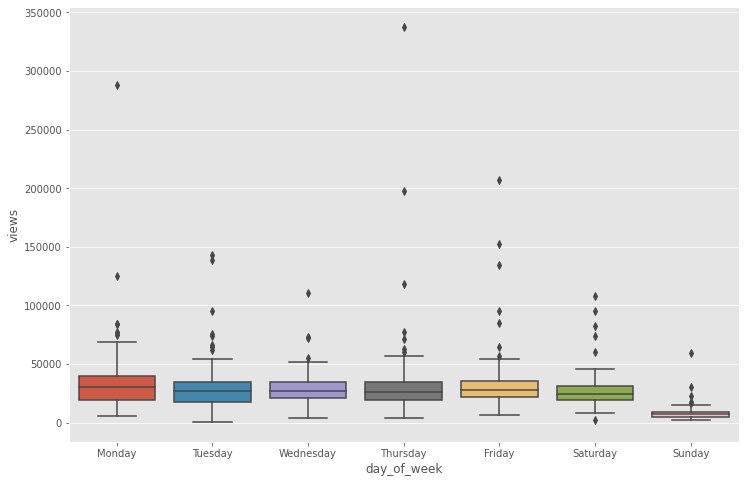

In [23]:
msk = df['views'] < 400000
sns.boxplot(x="day_of_week", y="views", data=df[msk], order=order)

#### En algunos días de la semana incrementan las vistas por tipo de entrenamiento?

#### 2 Variables categorica y una numerica

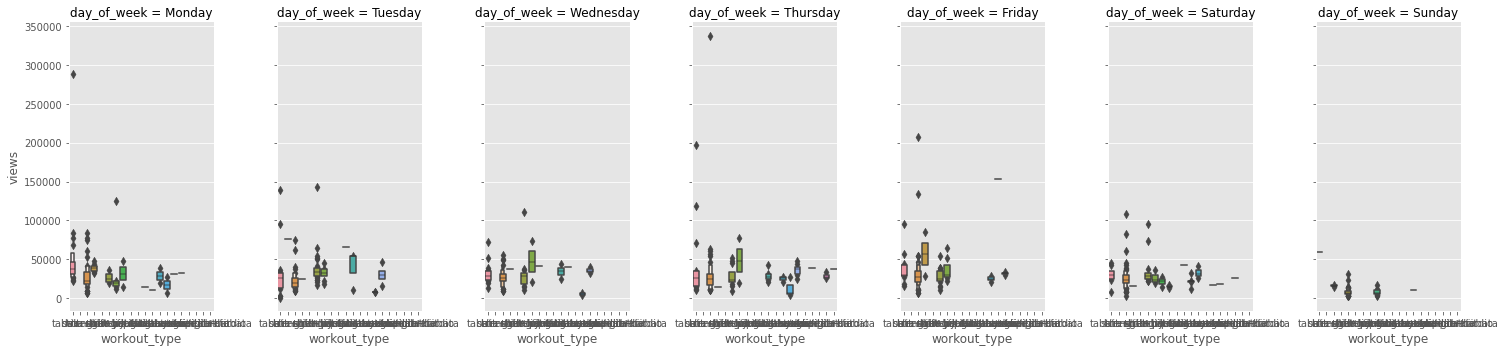

In [24]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="boxen", data=df[msk], col_order=order);

In [25]:
df['workout_type'].value_counts()


strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
strength+hiit+cardio      1
tabata+hiit               1
yoga+pilat                1
tabata+pilat+cardio       1
strength+tabata           1
Name: workout_type, dtype: int64

In [33]:
top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

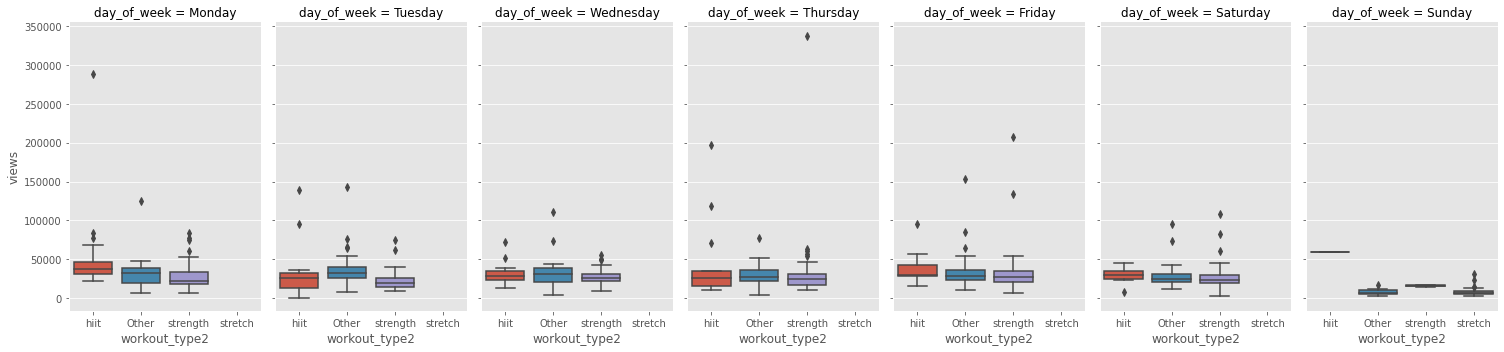

In [27]:

msk = df['views'] < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=df[msk], col_order=order,
            aspect=0.6)

### STRIPPLOT

> A swarm plot is a categorical scatterplot where the points are adjusted (only along the categorical axis) so that they don’t overlap.


> This gives a better representation of the distribution of values.



>seaborn documentation

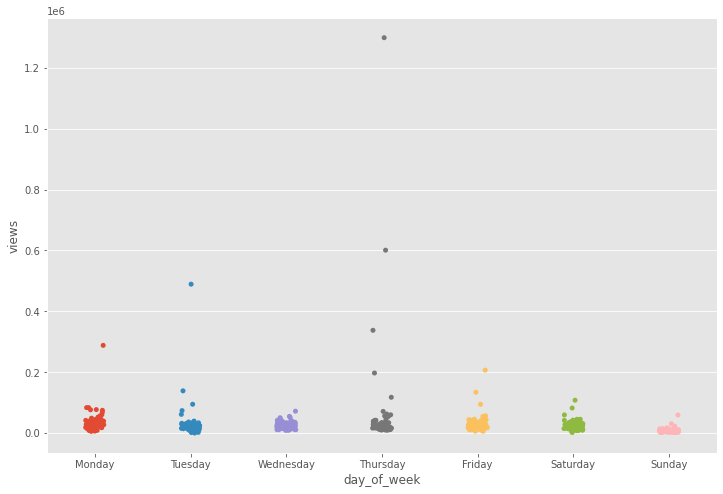

In [37]:
sns.stripplot(x="day_of_week", y="views", data=df[msk], order=order) # tambien se aplica para categoricos

 Heatmaps(Para zonas de calor)

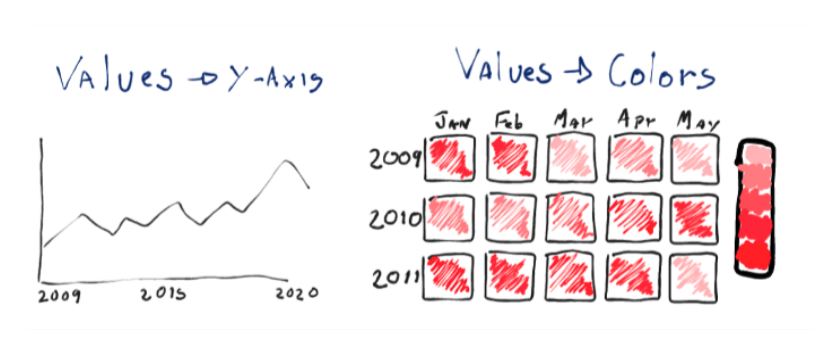

In [40]:
df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0) #ejecutar la de abajo primero

workout_type,cardio,cardio+hiit,hiit,hiit+cardio,none,pilat,pilat+cardio,strength,strength+cardio,strength+hiit,strength+hiit+cardio,strength+tabata,stretch,tabata,tabata+cardio,tabata+hiit,tabata+hiit+cardio,tabata+pilat+cardio,yoga,yoga+pilat
area,,,,,,,,,,,,,,,,,,,,
ab,25.0,0.0,5.0,9.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,2.0,1.0,0.0,0.0
ab+arm,2.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab+lower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm+chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+bicep,4.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+hip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butt,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


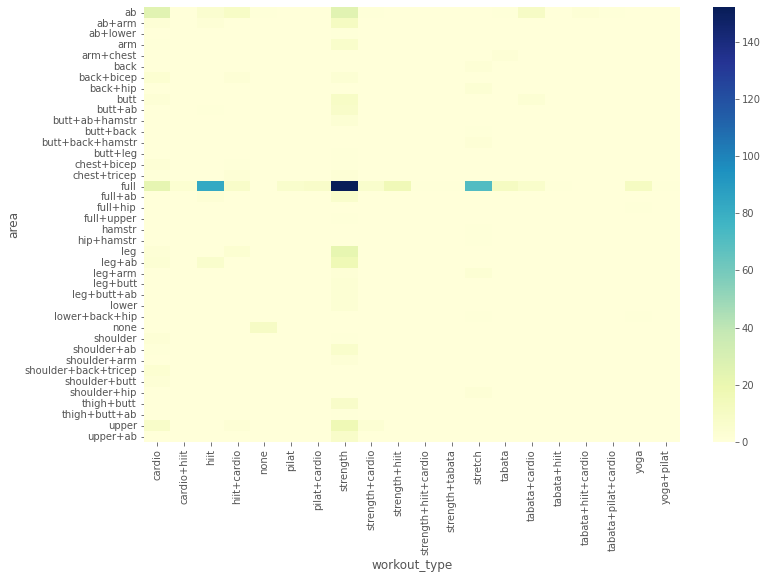

In [39]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)
sns.heatmap(df_area_workout_pivot, annot=False, fmt='.0f', cmap="YlGnBu")

In [50]:
# read file
dolar = pd.read_csv('/content/Foreign_Exchange_Rates.csv',
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
dolar

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-25,ND
2019-12-26,1.3124
2019-12-27,1.3073


In [51]:
dolar['CAD_USD'] = pd.to_numeric(dolar.CAD_USD, errors='coerce')
dolar.dropna(inplace=True)
dolar

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-24,1.3160
2019-12-26,1.3124
2019-12-27,1.3073


In [52]:
# create a copy of the dataframe, and add columns for month and year
dolar_m = dolar.copy()
dolar_m['month'] = [i.month for i in dolar_m.index]
dolar_m['year'] = [i.year for i in dolar_m.index]
# group by month and year, get the average
dolar_m = dolar_m.groupby(['month', 'year']).mean()
dolar_m

CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755
...              ...
12    2015  1.371255
      2016  1.333919
      2017  1.276870
      2018  1.343611
      2019  1.316895

[240 rows x 1 columns]

In [53]:
dolar_m = dolar_m.unstack(level=0)
dolar_m

CAD_USD                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   1.448600  1.451210  1.460774  1.468875  1.495736  1.477045  1.477785   
2001   1.503200  1.521563  1.558741  1.557767  1.541050  1.524538  1.530790   
2002   1.599714  1.596400  1.587743  1.581486  1.550155  1.531840  1.545550   
2003   1.541448  1.512147  1.476081  1.458205  1.383957  1.352510  1.382091   
2004   1.295755  1.329895  1.328578  1.341973  1.378860  1.357841  1.322505   
2005   1.224835  1.240053  1.216026  1.235900  1.255529  1.240168  1.222855   
2006   1.157165  1.148895  1.157309  1.144105  1.109991  1.113727  1.129445   
2007   1.176262  1.170989  1.168159  1.134986  1.095086  1.065105  1.050186   
2008   1.009943  0.998555  1.002943  1.013718  0.999305  1.016624  1.012964   
2009   1.224820  1.245200  1.264518  1.224182  1.152785  1.126355  1.122861   
2010   1.043811  1.057211  1.022900  1.005209  1.040280  1.037623  1.042229   
2011   0.993945  0.987637  0.976561  0.957952  0.968043  0.976645  0.955315   
2012   1.012985  0.996745  0.993773  0.992824  1.009732  1.028000  1.014200   
2013   0.992057  1.009784  1.024424  1.018673  1.019559  1.031400  1.040214   
2014   1.094010  1.105442  1.110681  1.099209  1.089386  1.083038  1.073918   
2015   1.212190  1.249905  1.261832  1.233682  1.217640  1.236495  1.286314   
2016   1.420811  1.379690  1.322639  1.281814  1.294529  1.289405  1.305235   
2017   1.318305  1.310916  1.338700  1.343705  1.360573  1.329486  1.269040   
2018   1.242905  1.258821  1.293255  1.273162  1.286627  1.312452  1.313343   
2019   1.330045  1.320872  1.337052  1.337814  1.345977  1.328870  1.310523   

                                                         
month        8         9         10        11        12  
year                                                     
2000   1.482813  1.486430  1.512476  1.542638  1.521875  
2001   1.539857  1.567939  1.571677  1.592245  1.578755  
2002   1.569418  1.576135  1.578009  1.571453  1.559219  
2003   1.396271  1.363371  1.322095  1.313044  1.312755  
2004   1.312677  1.288095  1.246935  1.196770  1.218883  
2005   1.204283  1.177681  1.177415  1.181545  1.161481  
2006   1.118213  1.116120  1.128538  1.135881  1.153235  
2007   1.057852  1.026745  0.975413  0.967238  1.002070  
2008   1.053457  1.058205  1.184695  1.217094  1.233695  
2009   1.087238  1.081638  1.054676  1.059300  1.053691  
2010   1.040395  1.032957  1.017900  1.012900  1.008062  
2011   0.981709  1.002500  1.019800  1.024755  1.023524  
2012   0.992383  0.978300  0.987155  0.996970  0.989820  
2013   1.040718  1.034235  1.036282  1.048642  1.063919  
2014   1.092633  1.101052  1.121155  1.132539  1.153162  
2015   1.314724  1.326581  1.307224  1.327853  1.371255  
2016   1.299783  1.310776  1.325095  1.343415  1.333919  
2017   1.260770  1.227875  1.260690  1.277335  1.276870  
2018   1.304248  1.303400  1.300441  1.320480  1.343611  
2019   1.327314  1.324050  1.318923  1.323658  1.316895

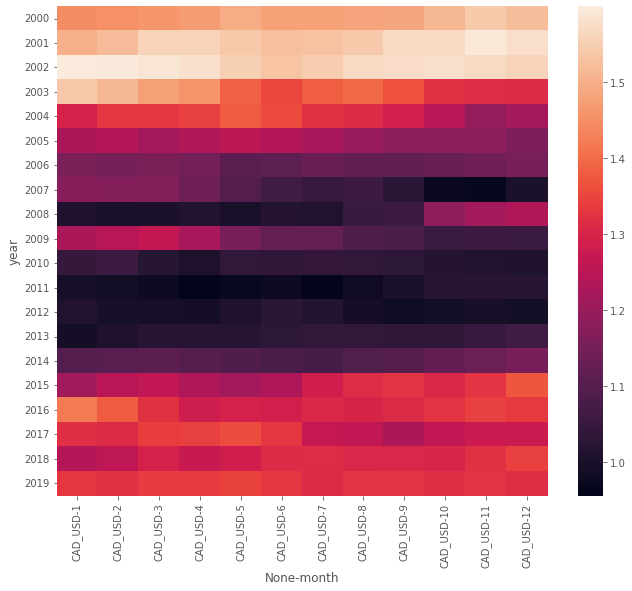

In [54]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dolar_m)
plt.show()


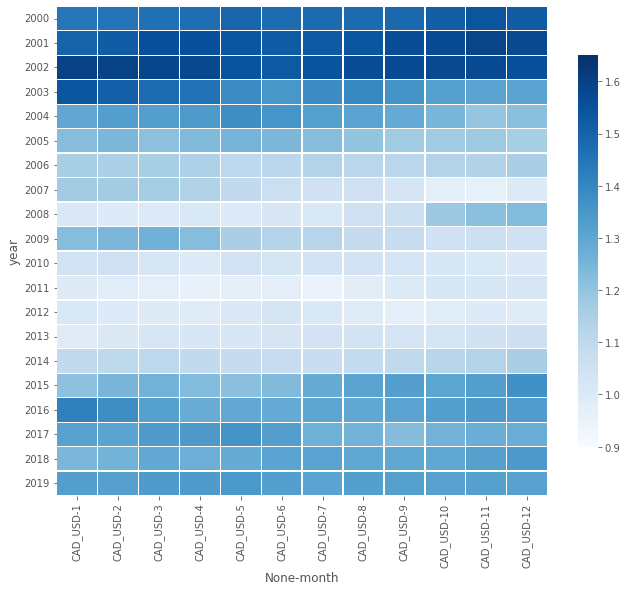

In [55]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(dolar_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

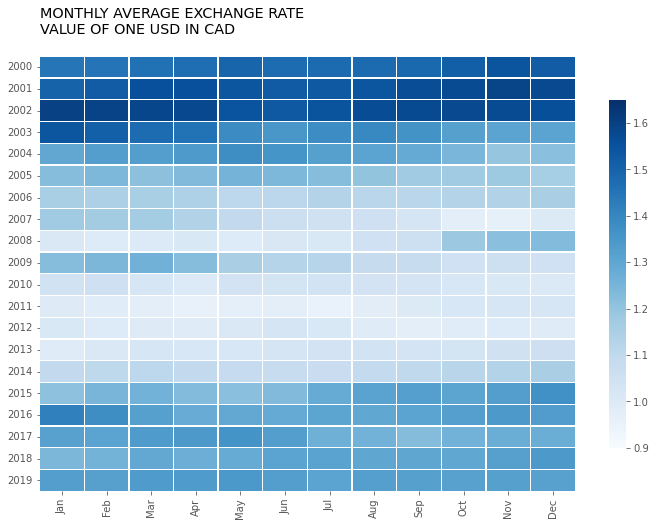

In [56]:
# xticks
sns.heatmap(dolar_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)


# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')

plt.show()

### HeatMap como Matriz de Correlación

!['dwight_correlation'](https://media.makeameme.org/created/correlation-implies-causation-17eb876840.jpg)


In [58]:
df = pd.read_csv('/content/cereal.csv')
# get correlations
df_corr = df.corr()
df_corr
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)
df_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [59]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [60]:
mask[1:, :-1]

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

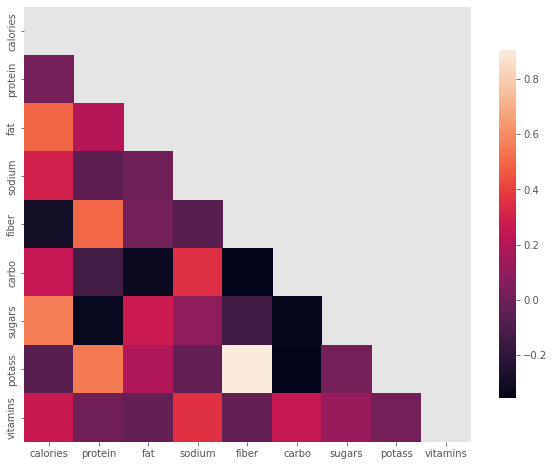

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, cbar_kws={"shrink": .8})
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


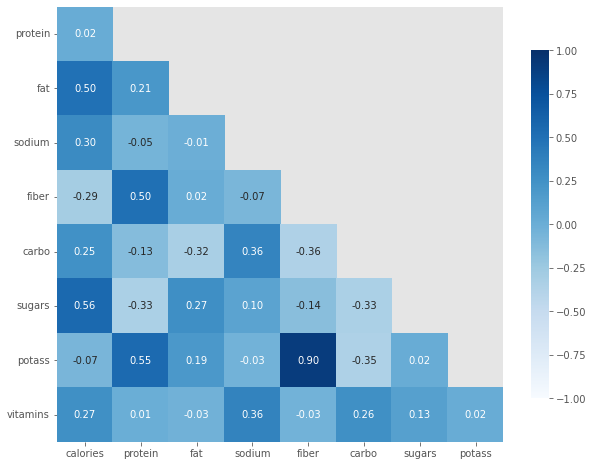

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [63]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


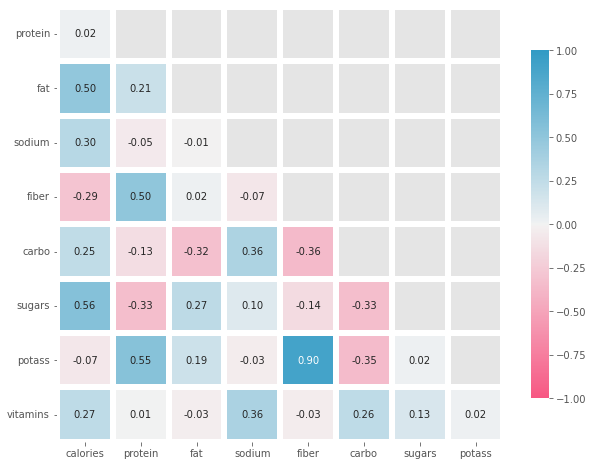

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=5,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


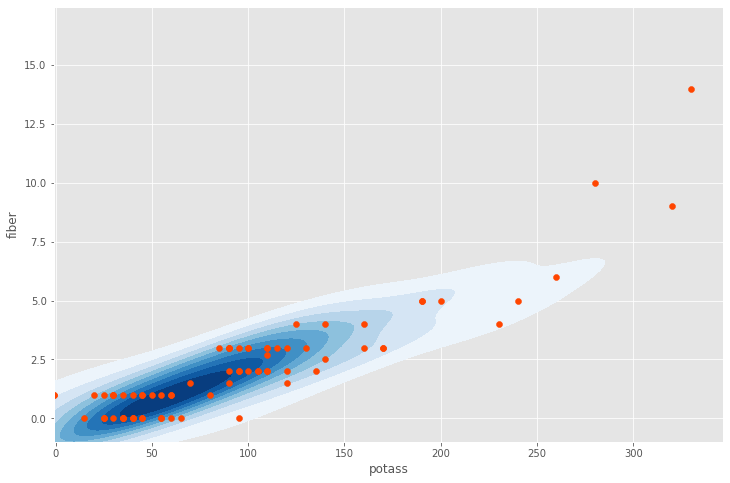

In [65]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')

### Dendograma

> El objetivo es agrupar las entidades para mostrar quién comparte similitudes con quién.


> El dendrograma acercará las entidades similares entre sí en el árbol.

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [67]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv', index_col=0)
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [68]:
Z = linkage(data, 'centroid')
Z

array([[  0.        ,   1.        ,   0.61532512,   2.        ],
       [ 11.        ,  12.        ,   0.98264948,   2.        ],
       [  9.        ,  10.        ,   1.52315462,   2.        ],
       [ 13.        ,  33.        ,   1.72826503,   3.        ],
       [ 17.        ,  25.        ,   5.14734155,   2.        ],
       [ 20.        ,  26.        ,   8.6535903 ,   2.        ],
       [ 19.        ,  36.        ,   8.83458438,   3.        ],
       [  6.        ,  23.        ,  10.07612029,   2.        ],
       [  2.        ,  37.        ,  12.3127599 ,   3.        ],
       [ 18.        ,  38.        ,  13.79640785,   4.        ],
       [ 21.        ,  22.        ,  14.01549946,   2.        ],
       [ 32.        ,  34.        ,  15.45799328,   4.        ],
       [ 14.        ,  15.        ,  15.62244462,   2.        ],
       [ 31.        ,  40.        ,  16.24371716,   4.        ],
       [ 28.        ,  39.        ,  19.70061801,   3.        ],
       [  8.        ,  45

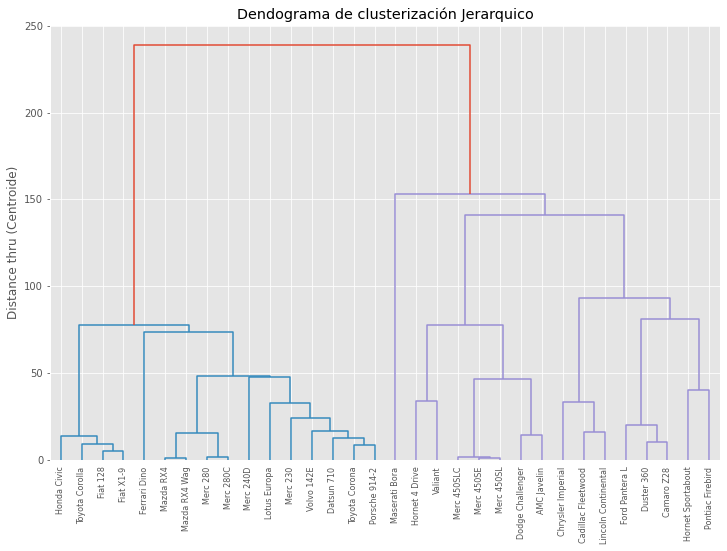

In [69]:
# Plot title
plt.title('Dendograma de clusterización Jerarquico')

# Plot axis labels
plt.xlabel('')
plt.ylabel('Distance thru (Centroide)')

# Make the dendrogram
dendrogram(Z, labels=data.index, leaf_rotation=90)

# Show the graph
plt.show()  #se coparten datos

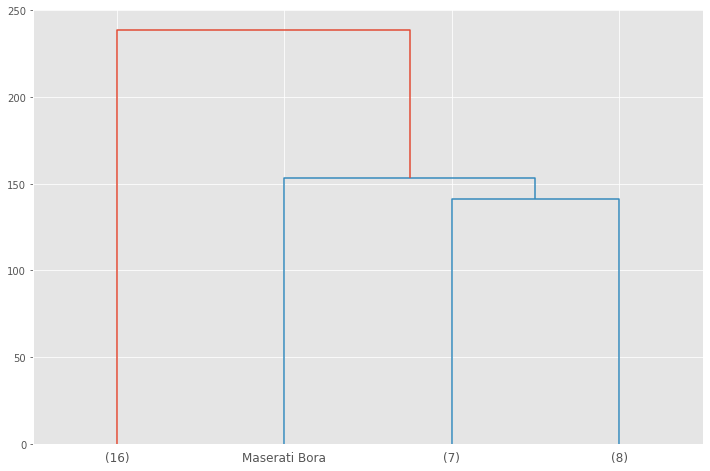

In [70]:
# method 1: lastp
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
plt.show()

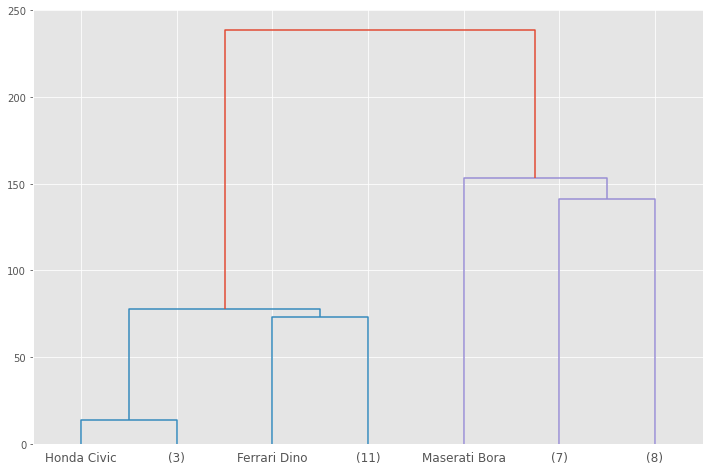

In [71]:
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram tree are displayed.
plt.show()

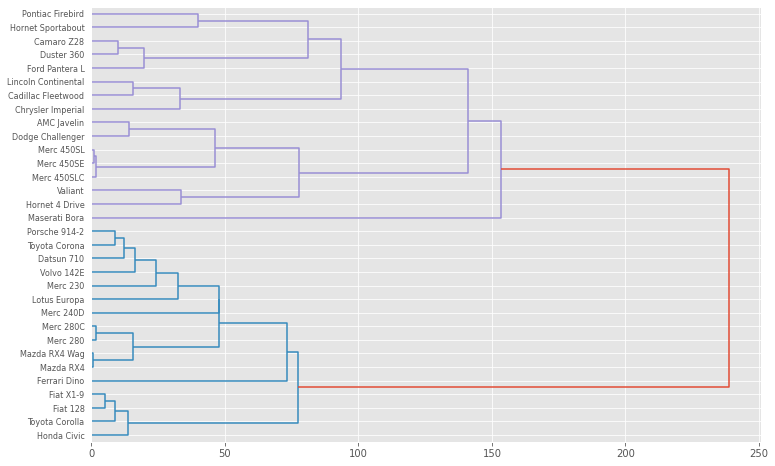

In [72]:
hierarchy.dendrogram(Z, orientation="right", labels=data.index)
plt.show()


### Treemap

Fue creado en los 90's por 

#### Ben Shneiderman profe de la universidad de Maryland


> Ees una visualización basada en rectángulos que le permite representar un conjunto de datos ordenado jerárquicamente (estructurado en árbol). 


> La idea conceptual es comparar cantidades y mostrar patrones de alguna estructura jerárquica en un espacio físicamente restringido. Para ello, se utilizan rectángulos de diferentes tamaños y colores para mostrar el conjunto de datos desde diferentes perspectivas.

![ben_treemap](https://miro.medium.com/max/1400/0*p_uZc3SKPn49_AzL.jpeg)

In [73]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import squarify

In [76]:
animals = pd.read_csv('/content/animals.csv')
# convert to numeric and drop na
animals['Number of Animals'] = pd.to_numeric(animals['Number of Animals'], errors='coerce')
animals.dropna(inplace=True)
animals.head()
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Breed              222 non-null    object 
 1   Number of Animals  222 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


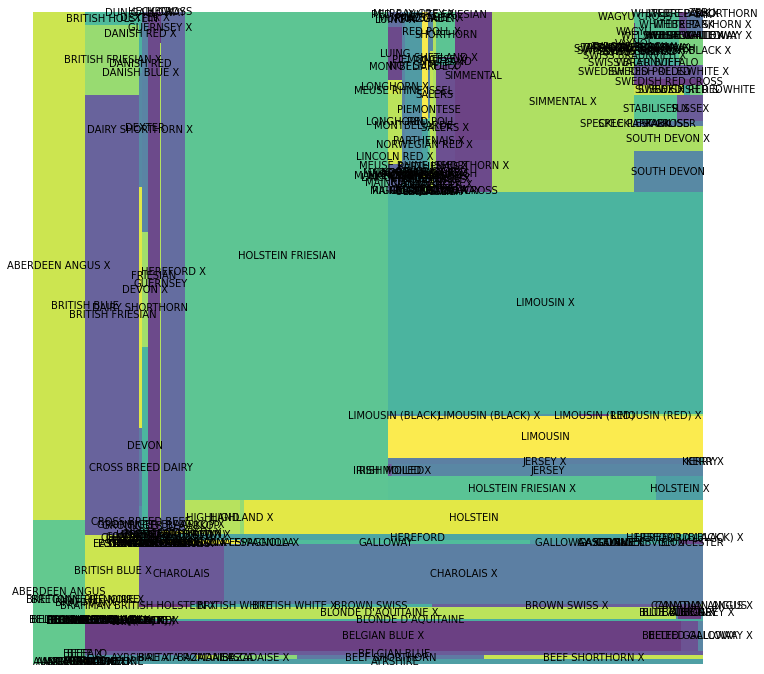

In [77]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'], 
              alpha=.8 )
plt.axis('off')
plt.show()

In [78]:
animals.sort_values('Number of Animals', ascending=False, inplace=True)
animals

,Breed,Number of Animals
114,HOLSTEIN FRIESIAN,1958397.0
128,LIMOUSIN X,1382696.0
57,CHAROLAIS X,564074.0
1,ABERDEEN ANGUS X,516932.0
182,SIMMENTAL X,506397.0
...,...,...
26,BLACK POLL,1.0
43,BRETONNE PIE-NOIRE X,1.0
27,BLACK POLL X,1.0
102,HECK CROSS,1.0


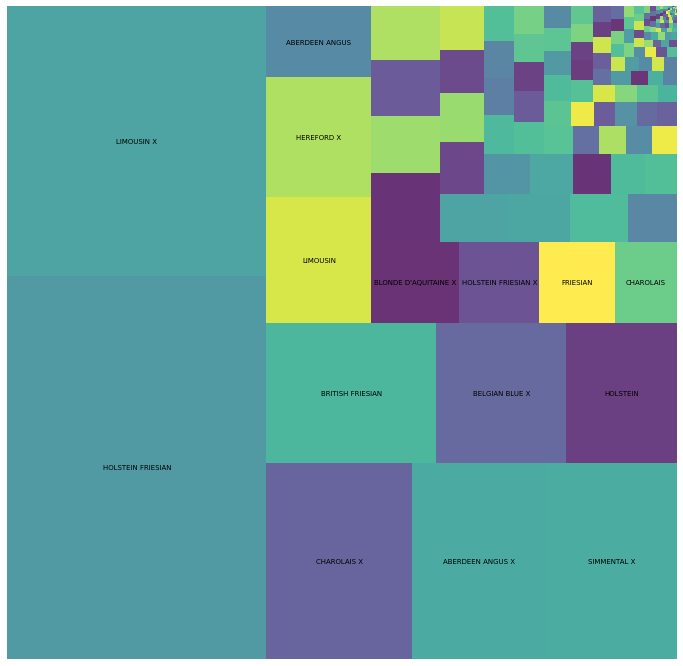

In [79]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'][:15], 
              alpha=.8, text_kwargs={'fontsize':7} )
plt.axis('off')
plt.show()

In [80]:
nasdaq = pd.read_csv('https://raw.githubusercontent.com/hashABCD/Publications/main/Medium/Treemap%20in%20python/market_cap_top20.csv')
nasdaq.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2165.05B,29.22,130.21,0.36%,"7,83,39,673"
1,2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1880.86B,34.36,252.46,1.09%,"2,69,92,758"
2,3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,USA,1667.50B,62.64,3291.61,-0.45%,"47,02,758"
3,4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1646.62B,31.97,2398.69,0.73%,"11,61,766"
4,5,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1580.64B,30.38,2351.93,0.62%,"14,44,167"


In [81]:
nasdaq['Market Cap']=nasdaq['Market Cap'].apply(lambda x: float(str(x).replace('B','')))
nasdaq.Change=nasdaq.Change.apply(lambda x:float(str(x).replace('%','')))
nasdaq.Volume=nasdaq.Volume.apply(lambda x:int(str(x).replace(',','')))

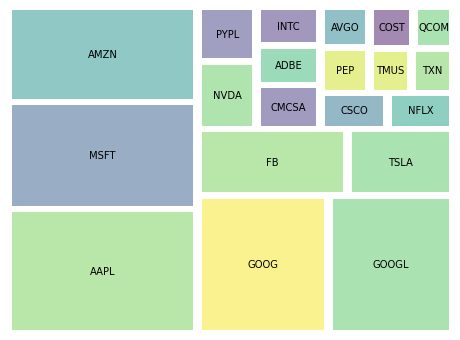

In [82]:
plt.figure(figsize=(8,6))
squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker, alpha=0.5, pad=True)
plt.axis('off')
plt.show()

In [83]:
cmap=matplotlib.cm.RdYlGn
norm=matplotlib.colors.Normalize(vmin=nasdaq.Change.min(), vmax=nasdaq.Change.max())
colors=[cmap(norm(i)) for i in nasdaq.Change]

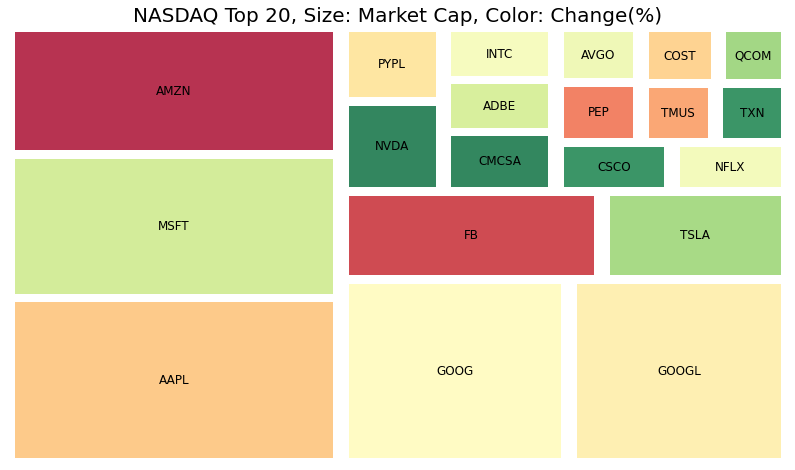

In [84]:
plt.figure(figsize=(14,8))
title='NASDAQ Top 20, Size: Market Cap, Color: Change(%)'
plt.title(title, size=20)

squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker,alpha=0.8, color=colors, pad=True, 
              text_kwargs={'color':'black', 'size':12})

plt.axis('off')
plt.show()

In [96]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import plotly.express as px

AttributeError: ignored

In [90]:
vgsales = pd.read_csv('/content/vgsales.csv')
vgsales.dropna(inplace=True)
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [103]:
fig = px.treemap(vgsales, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
fig.show()

NameError: ignored

In [104]:
import plotly.express as px
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

AttributeError: ignored

### WORDCLOUD

In [105]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

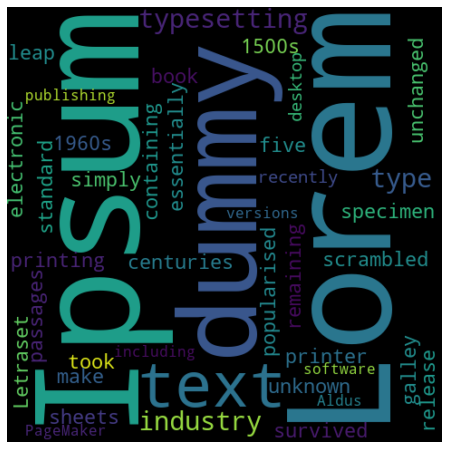

In [107]:
# Create a list of word
text=("Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [108]:
import numpy as np
from PIL import Image
from os import path
import os
import random

In [109]:

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [110]:
d = os.getcwd()
d

'/content'

In [111]:
mask = np.array(Image.open(path.join(d, "assets/stormtrooper_mask.png")))

FileNotFoundError: ignored

In [ ]:
text = open(path.join(d, 'data/a_new_hope.txt')).read()
text

In [ ]:
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [ ]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)

In [ ]:
default_colors = wc.to_array()
plt.grid(False)
plt.axis("off")
plt.title("Escala de Grises")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

In [ ]:
wc.to_file("Episode4.png")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
import csv
import datetime

import tweepy
import nltk
from nltk.corpus import stopwords
import re

Ser actividad Twitter

In [ ]:
# Pass OAuth details to tweepy's OAuth handler

%store -r access_token
%store -r access_token_secret
%store -r api_key
%store -r api_key_secret

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [ ]:
search_term = "#elon+musk -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-05-01').items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

In [ ]:
all_tweets_no_urls[0].lower().split()

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

In [ ]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls


In [ ]:
sentence = ' '.join(all_words_no_urls)
sentence

In [ ]:
mask = np.array(Image.open(path.join(d, "Bitcoin.png")))

In [ ]:
wc_elon = WordCloud(max_words=100000, mask=mask, margin=10,
               random_state=1).generate(sentence)

In [ ]:
default_colors = wc_elon.to_array()
plt.title("Crypto Tweets")
plt.imshow(wc_elon.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")